In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Import the dataset
file_path = r'C:\Users\USER\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [3]:
# Step 2: Data Type Conversion and Encoding
# Binary encoding for categorical variables
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# One-hot encoding for multi-class variables
data = pd.get_dummies(data, columns=['CAEC', 'CALC', 'MTRANS'], drop_first=True)

# Encode target variable
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

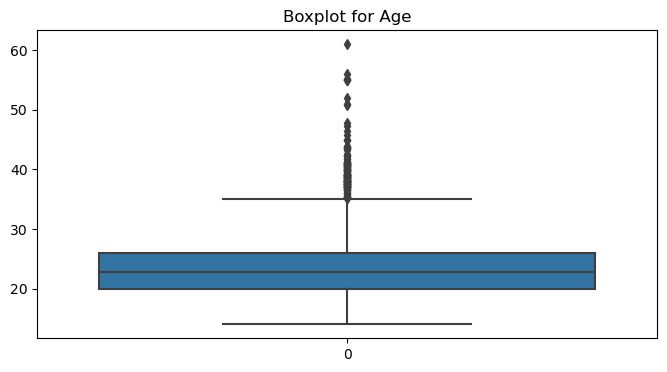

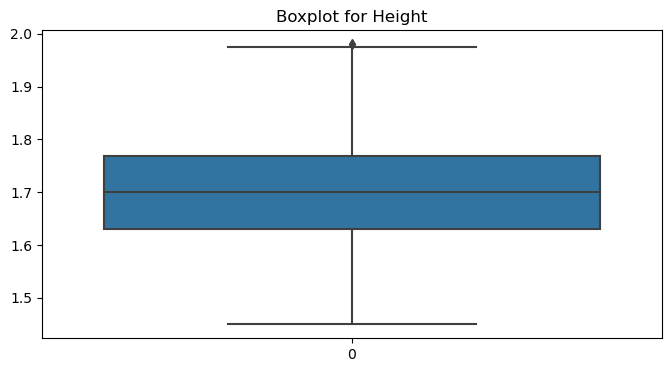

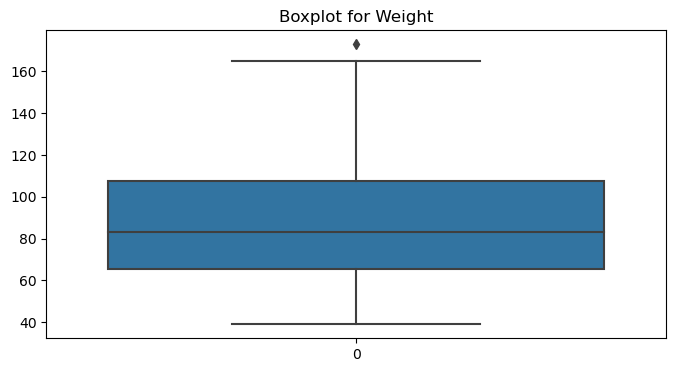

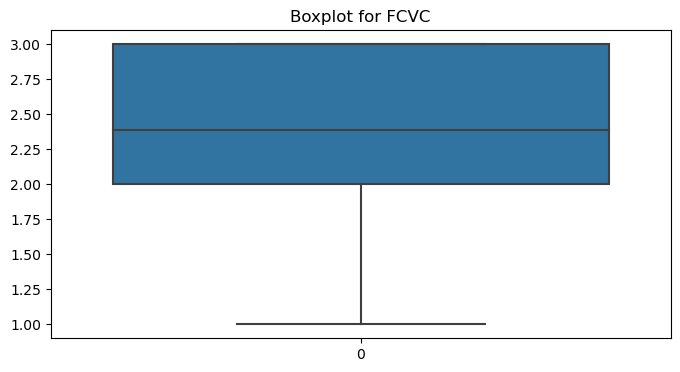

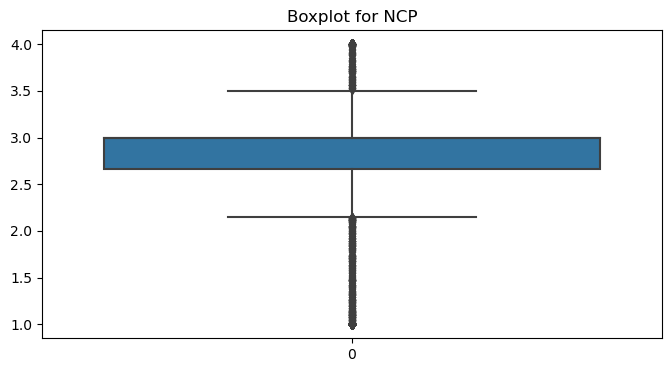

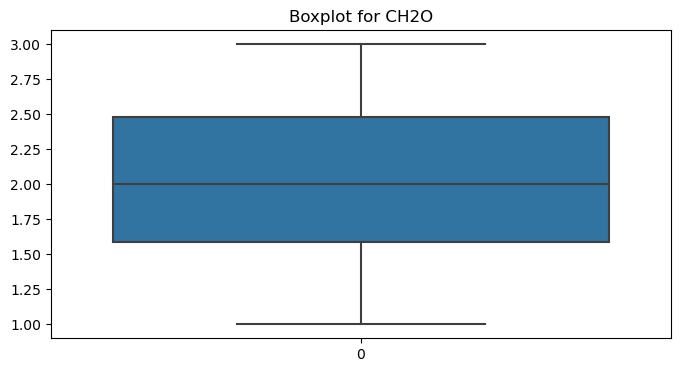

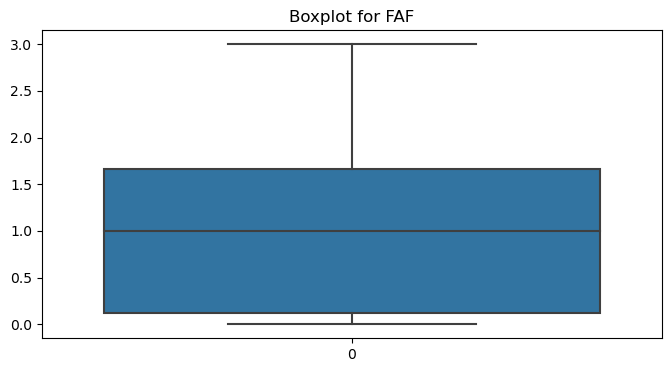

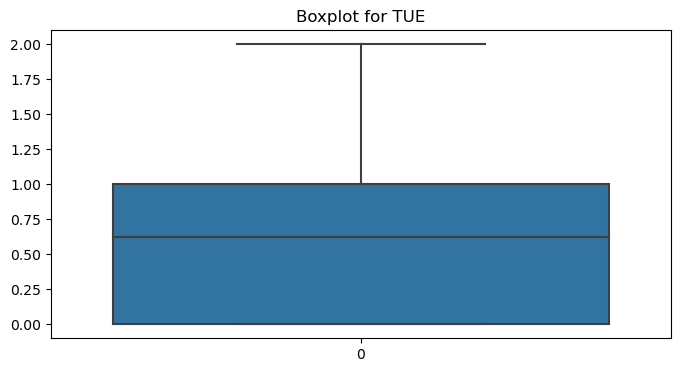

In [4]:
# Step 3: Outlier Detection and Handling
continuous_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in continuous_cols:
    # Visualize outliers with boxplots
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
    # Handle outliers by capping
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [6]:
# Step 4: Normalization/Standardization
scaler = MinMaxScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

# Save cleaned data for further analysis
data.to_csv('clean_obesity_dataset.csv', index=False)
print("\nData Cleaning Complete. Cleaned data saved as 'cleaned_obesity_dataset.csv'.")


Data Cleaning Complete. Cleaned data saved as 'cleaned_obesity_dataset.csv'.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
data = pd.read_csv('clean_obesity_dataset.csv')

# Task 1: Summary Statistics
print("\nSummary Statistics for Continuous Variables:")
print(data.describe())


Summary Statistics for Continuous Variables:
            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921     0.470145     0.478325     0.362229   
std       0.500083     0.250362     0.177321     0.199344   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.282135     0.342101     0.201522   
50%       1.000000     0.416424     0.476089     0.334940   
75%       1.000000     0.569281     0.605261     0.520913   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     0.709522     0.504510   
std                          0.386247     0.320371     0.266963     0.293688   
min                          0.000000     0.000000     0.000000     0.000000   
25% 

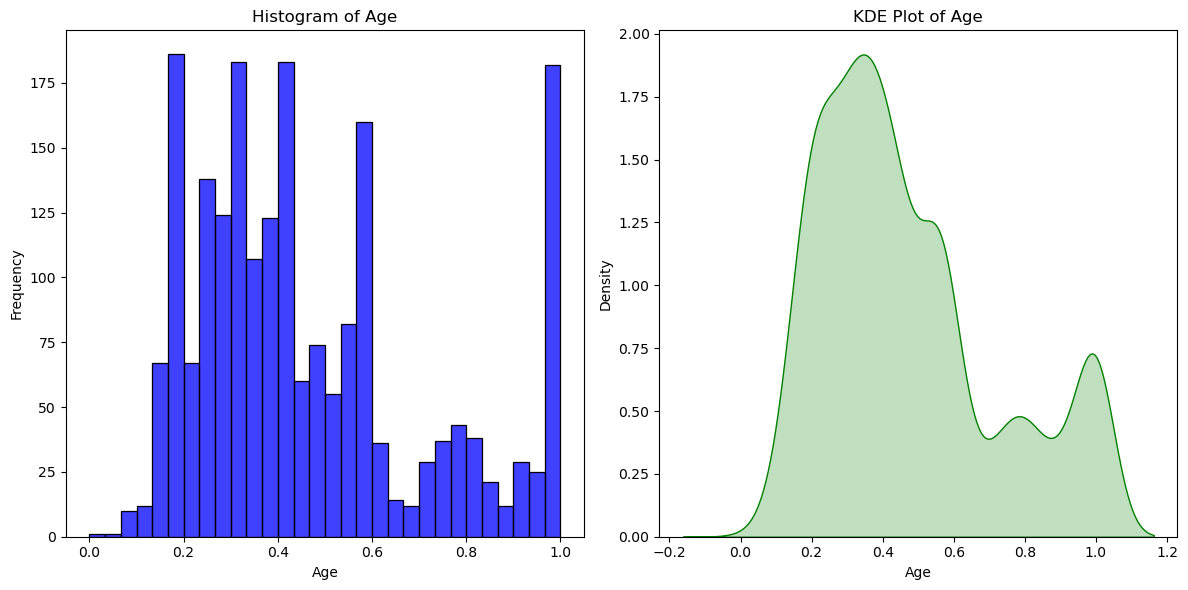

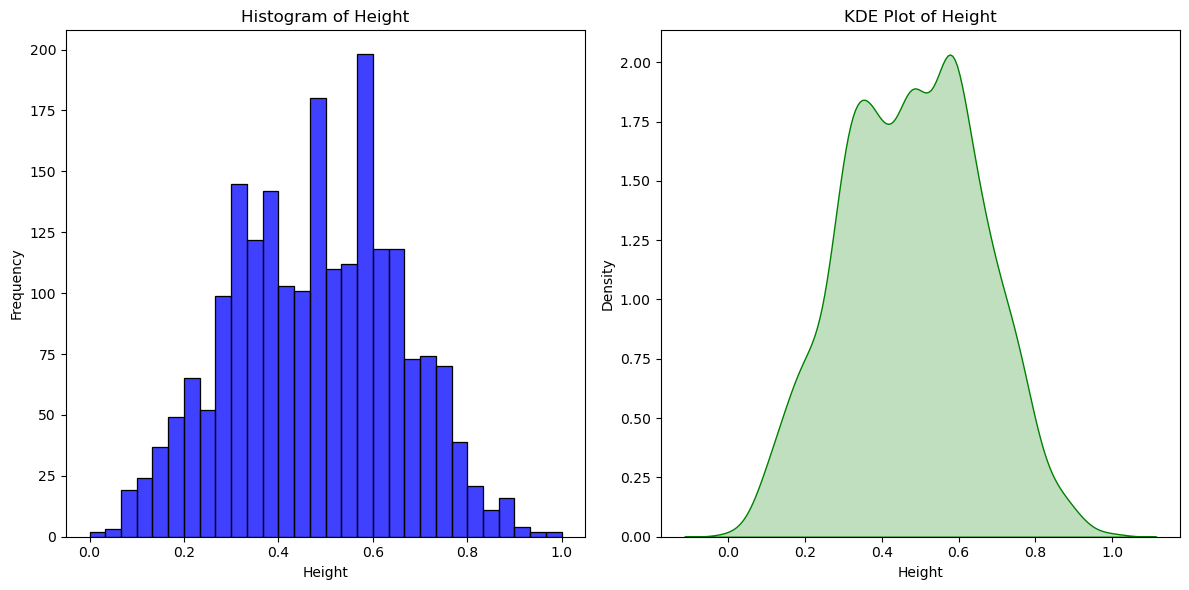

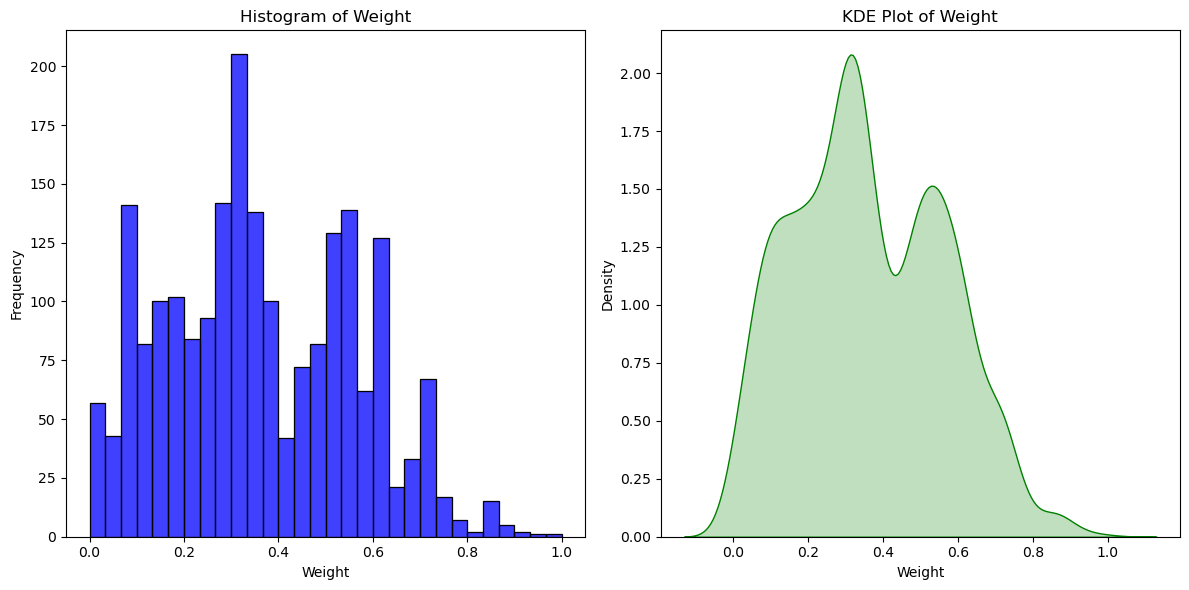

In [8]:
# Task 2: Distribution Analysis
# Plot histograms and KDEs for key variables
key_vars = ['Age', 'Height', 'Weight']
for var in key_vars:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=False, bins=30, color='blue')
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.kdeplot(data[var], fill=True, color='green')
    plt.title(f"KDE Plot of {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

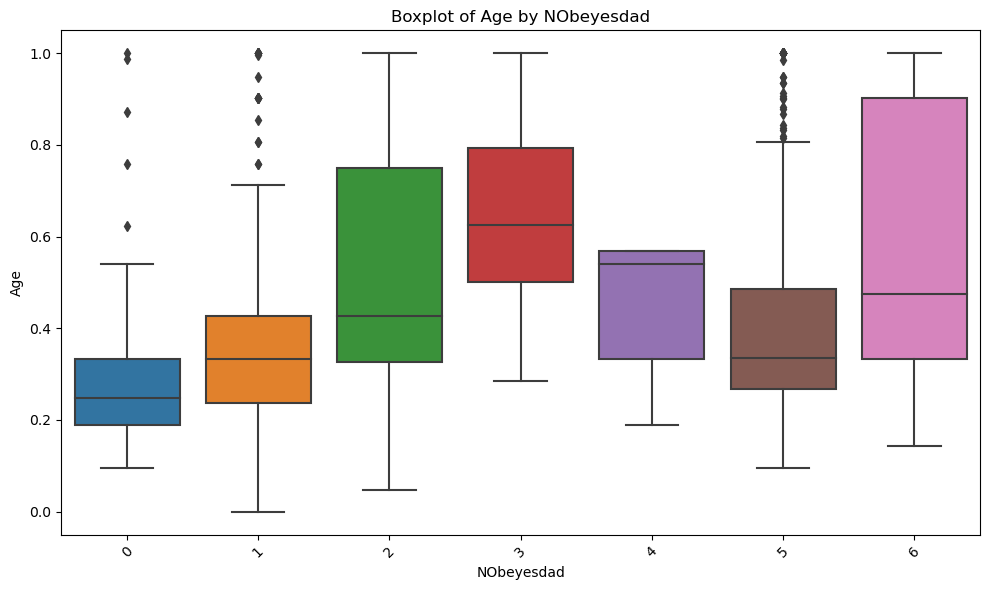

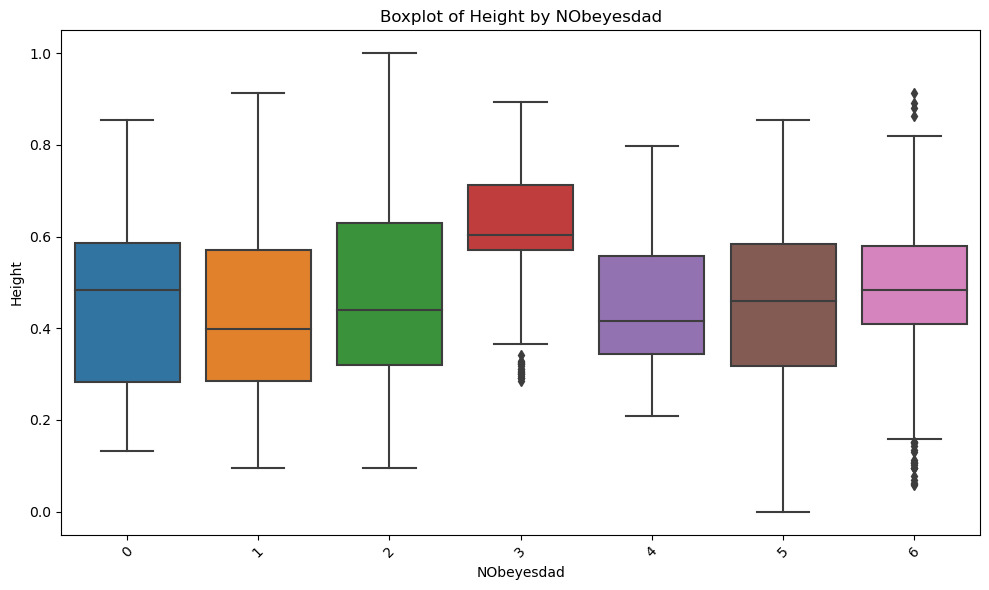

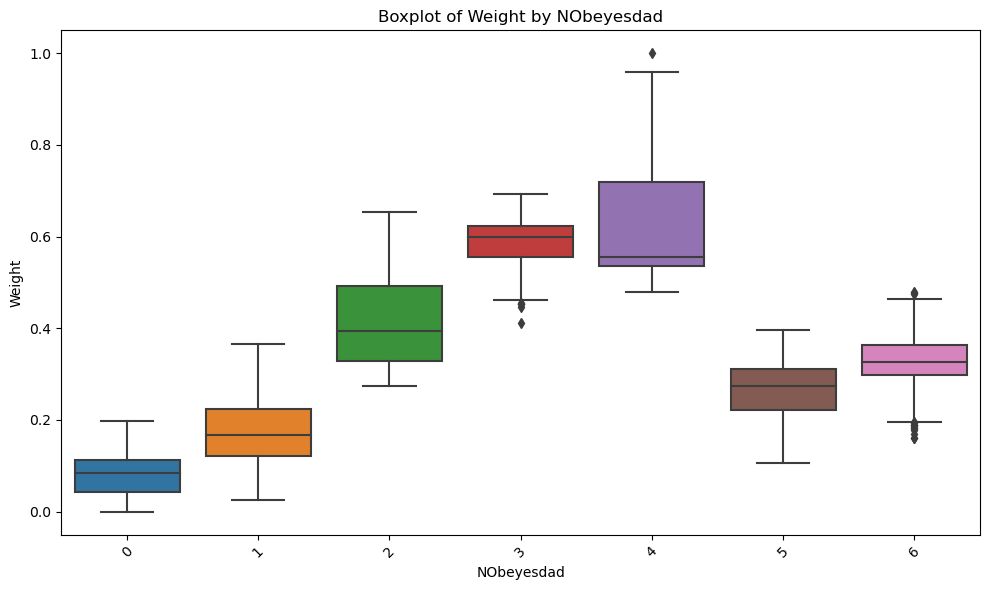

In [9]:
# Task 3: Relationship Exploration
# Boxplots to explore relationships
categorical_vars = ['NObeyesdad']  # Target variable
for var in categorical_vars:
    for cont_var in key_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[var], y=data[cont_var])
        plt.title(f"Boxplot of {cont_var} by {var}")
        plt.xlabel(var)
        plt.ylabel(cont_var)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

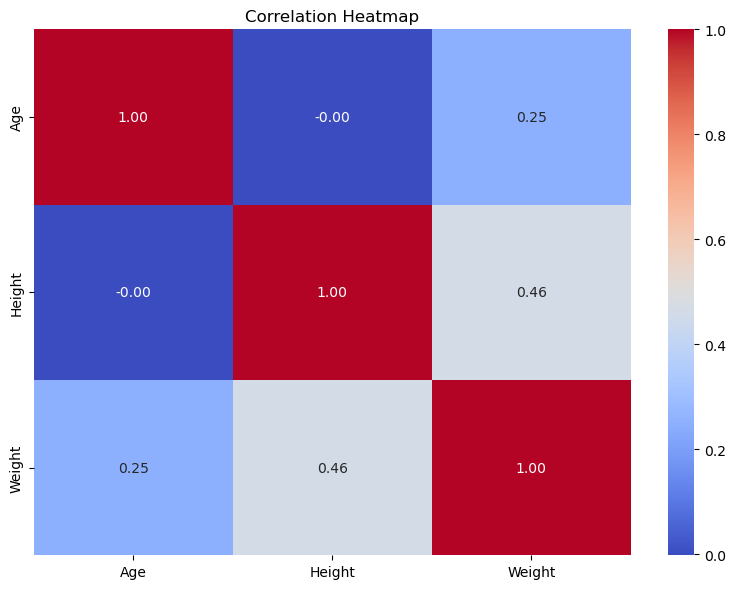

In [10]:
# Task 4: Correlation Analysis
# Heatmap for continuous variables
correlation_matrix = data[key_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_4568\731971299.py:19: UserWarning: The figure layout has changed to tight
  pair_plot.fig.tight_layout()


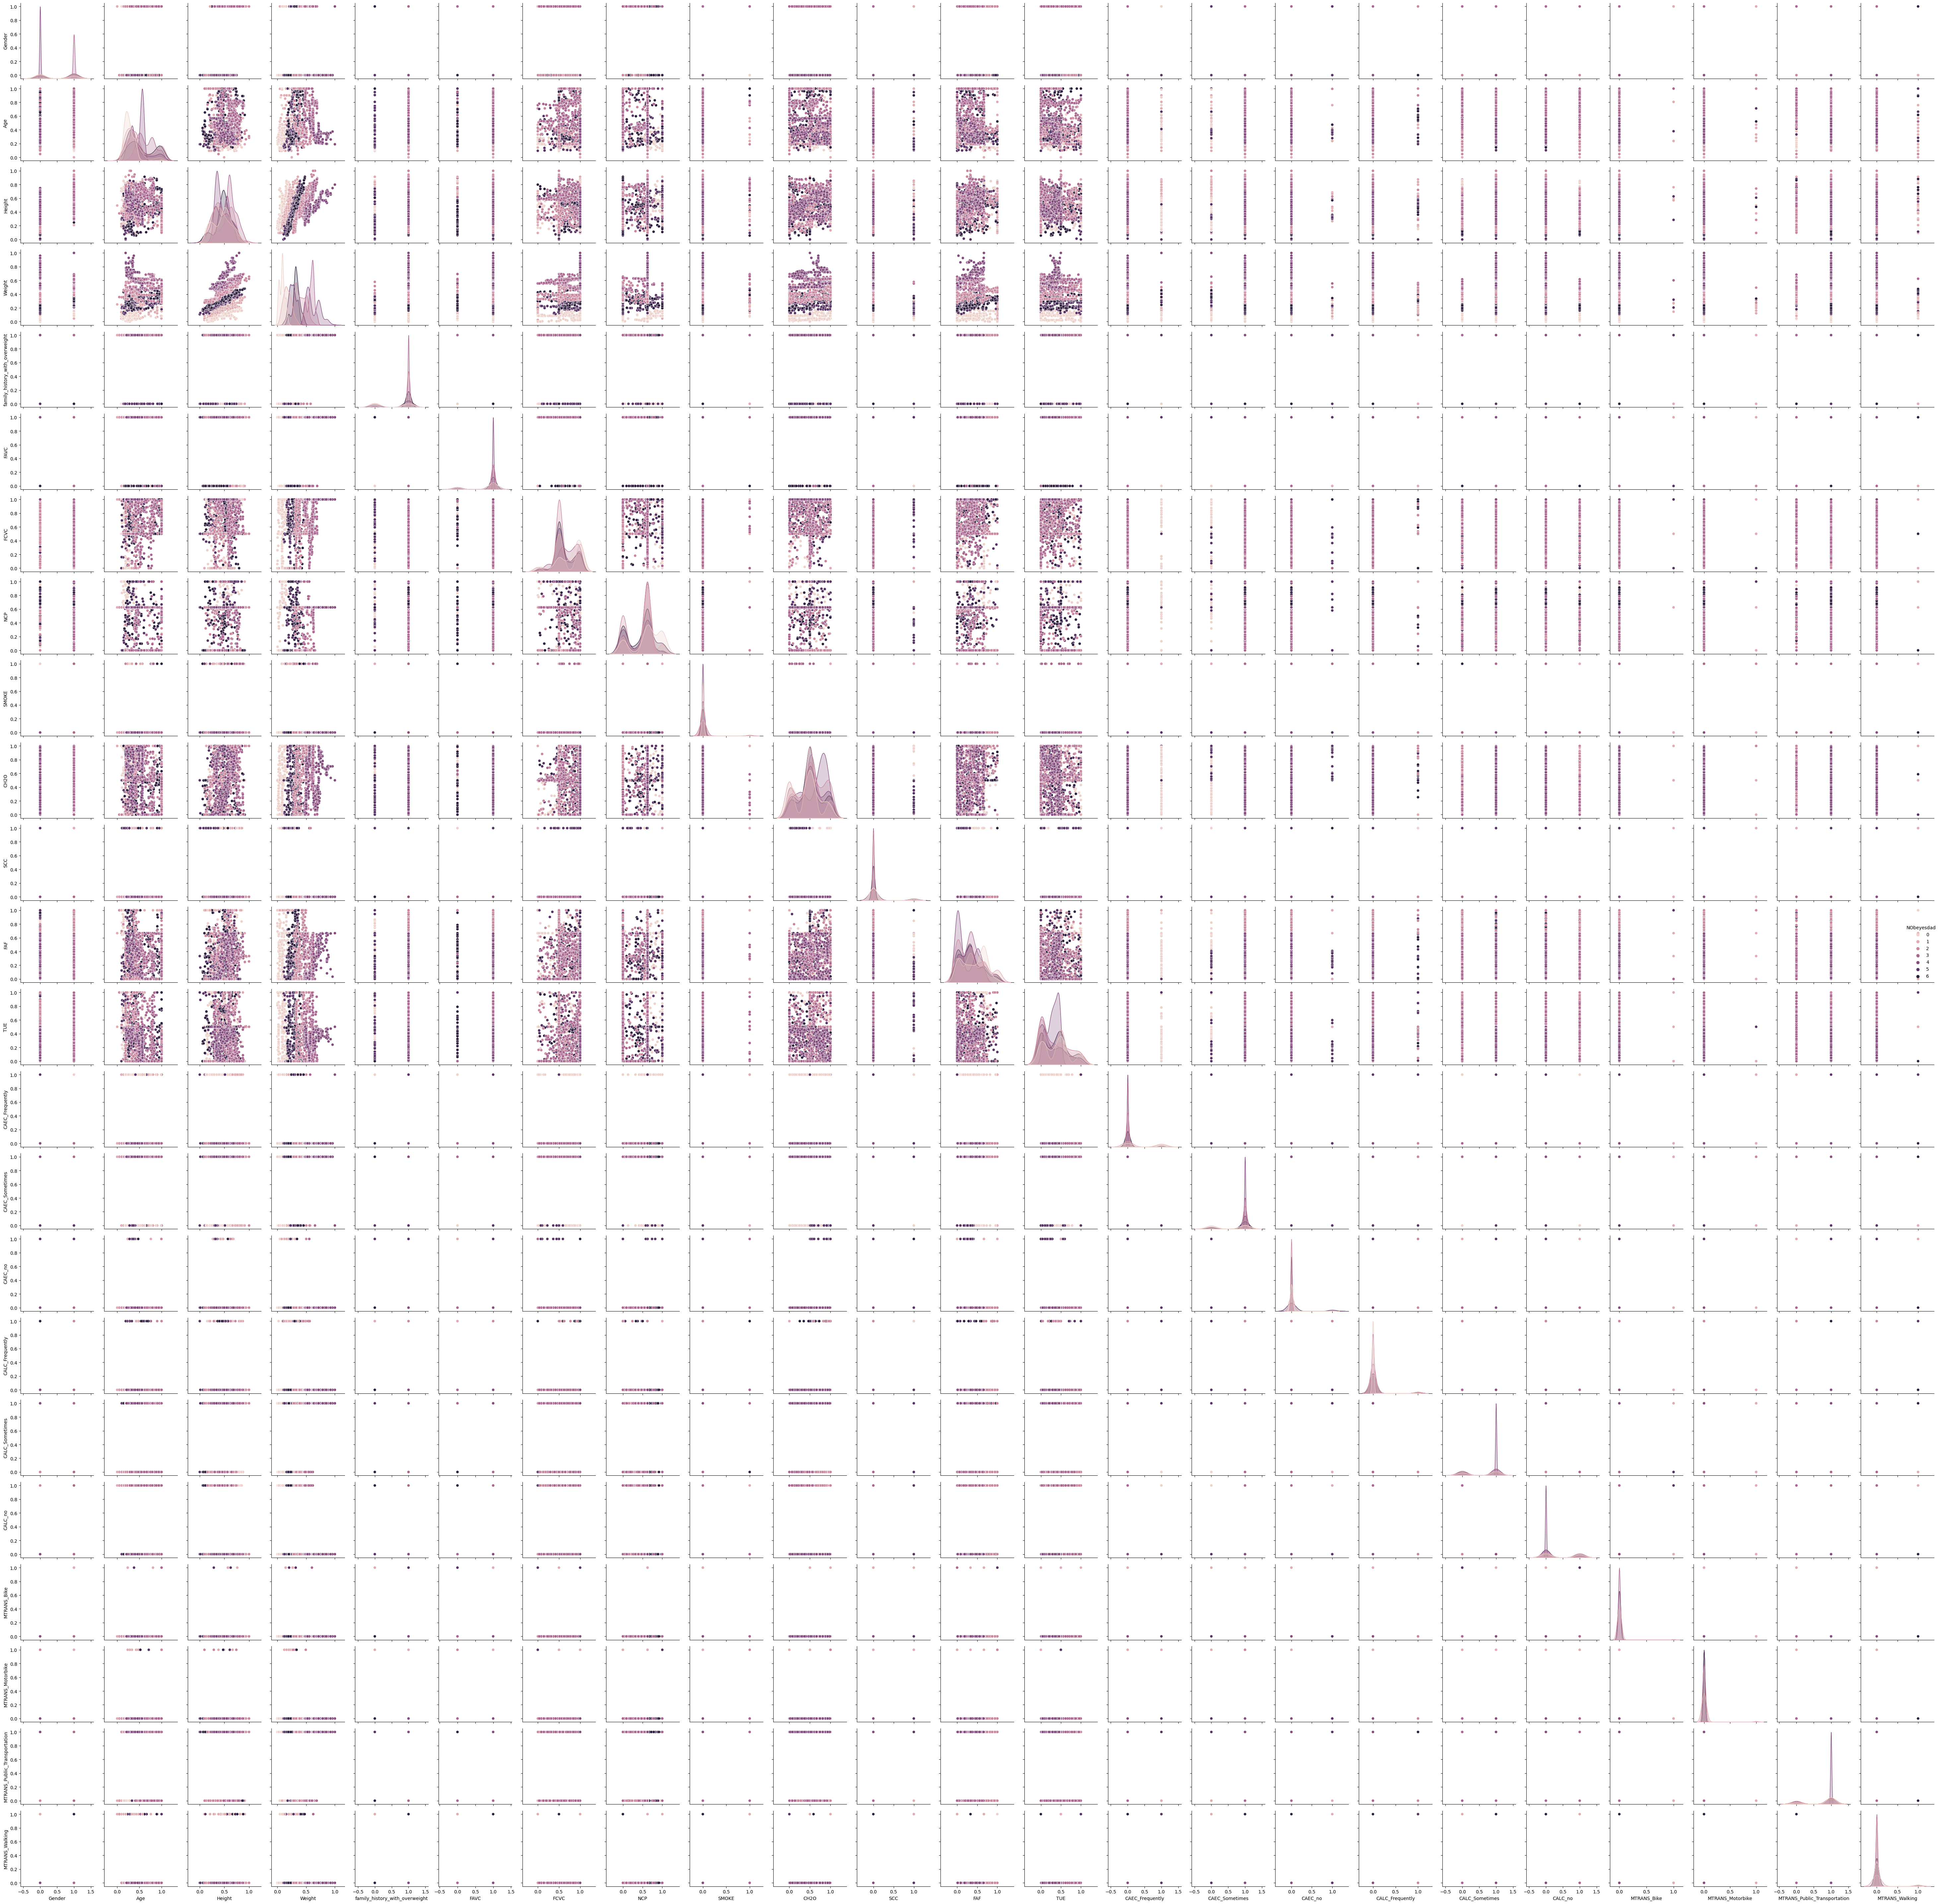

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
data = pd.read_csv('clean_obesity_dataset.csv')

# Separate features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pair_plot = sns.pairplot(data, hue='NObeyesdad', diag_kind='kde')
pair_plot.fig.tight_layout()
plt.show()

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest Model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


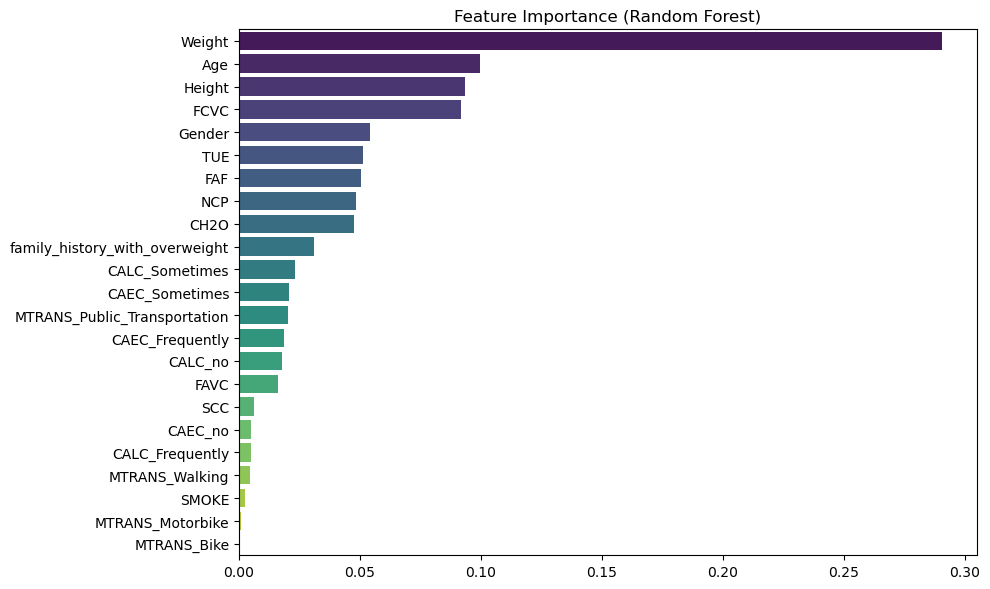

In [12]:
# Task 3: Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

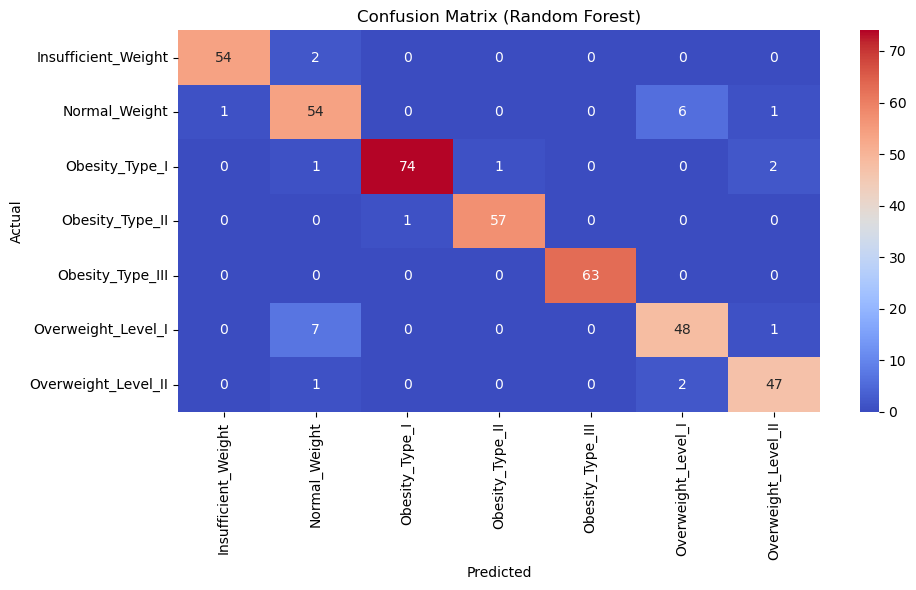

In [13]:
# Task 4: Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap="coolwarm", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [14]:
# Task 5: Model Evaluation
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Logistic Regression Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.96      0.81        56
      Normal_Weight       0.61      0.27      0.38        62
     Obesity_Type_I       0.75      0.69      0.72        78
    Obesity_Type_II       0.76      0.97      0.85        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.65      0.66      0.65        56
Overweight_Level_II       0.51      0.48      0.49        50

           accuracy                           0.72       423
          macro avg       0.70      0.72      0.70       423
       weighted avg       0.71      0.72      0.70       423


Random Forest Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.83      0.87      0.85        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II   

In [16]:
#Model evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Evaluation Metrics:
Accuracy: 0.7210401891252955
Precision: 0.7090439192925024
Recall: 0.7210401891252955
F1-Score: 0.7007211457848922

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.69      0.96      0.81        56
      Normal_Weight       0.61      0.27      0.38        62
     Obesity_Type_I       0.75      0.69      0.72        78
    Obesity_Type_II       0.76      0.97      0.85        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.65      0.66      0.65        56
Overweight_Level_II       0.51      0.48      0.49        50

           accuracy                           0.72       423
          macro avg       0.70      0.72      0.70       423
       weighted avg       0.71      0.72      0.70       423


Random Forest Evaluation Metrics:
Accuracy: 0.9385342789598109
Precision: 0.9397823684682257
Recall: 0.9385342789598109
F1-Score: 0.938998888399

In [17]:
# Save all files for submission
data.to_csv('final_cleaned_data3.csv', index=False)
print("Project files prepared for submission: 'final_cleaned_data.csv' and 'project_report.txt'")


Project files prepared for submission: 'final_cleaned_data.csv' and 'project_report.txt'
